## Samantha Beard

#### DSC 540 Week 5-6 Exercises

### 1. Data Wrangling with Python: Activity 7, page 207
In this activity you are given the Wikipedia page where we have the GDP of all countries listed and you are asked to create three data frames from the three sources mentioned in the page ( link - https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal) )

You will have to -

* Open the page in a separate chrome/firefox tab and use something like inspect element tool to see the source HTML and understand the structure
* Read the page using bs4
* Find the table structure you will need to deal with (how many tables are there)
* Find the right table using bs4
* Separate the Source Names and their corresponding data
* Get the source names from the list of sources you have created
* Seperate the header and data from the data that you separated before. For the first source only. And then create a DataFrame using that
* Repeat the last task for the other two data sources.

#### Task 1 create a soup with bs4 and load the data to work later on it

In [2]:
# import libraries
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
# import file 
file = open("List of countries by GDP (nominal) - Wikipedia.htm", "r", encoding="utf8")
soup = BeautifulSoup(file)
file.close()

#### Task 2 How many tables are there?

In [15]:
#put all tables into one var and then use len to count.
all_tables = soup.find_all("table")
print("Total number of tables are {} ".format(len(all_tables)))

Total number of tables are 9 


#### Task 3 find the right table using the class attribute

In [13]:
#narrowing the search/find to classes equating to wikitable
data_table = soup.find("table", {"class": '"wikitable"|}'})
print(type(data_table))

<class 'bs4.element.Tag'>


#### Task 4 Let's separate the source and the actual data

In [16]:
#using the source list, we are doing a for loop to count
sources = data_table.tbody.findAll('tr', recursive=False)[0]
sources_list = [td for td in sources.findAll('td')]
print(len(sources_list))

3


In [20]:
# using the data table we created earlier, we are doing a for loop to count
data = data_table.tbody.findAll('tr', recursive=False)[1].findAll('td', recursive=False)
data_tables = []
for td in data:
    data_tables.append(td.findAll('table'))
len(data_tables)

3

#### Task 5 Checking how to get the source names

In [21]:
source_names = [source.findAll('a')[0].getText() for source in sources_list]
print(source_names)

['International Monetary Fund', 'World Bank', 'United Nations']


#### Task 6 Seperate the header and data for the first source

In [22]:
header1 = [th.getText().strip() for th in data_tables[0][0].findAll('thead')[0].findAll('th')]
header1

['Rank', 'Country', 'GDP(US$MM)']

In [23]:
rows1 = data_tables[0][0].findAll('tbody')[0].findAll('tr')[1:]
data_rows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows1]
df1 = pd.DataFrame(data_rows1, columns=header1)
df1.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,600"
1,2,China[n 1],"12,014,610"
2,3,Japan,"4,872,135"
3,4,Germany,"3,684,816"
4,5,United Kingdom,"2,624,529"


#### Task 7 Do the same for the other two sources

In [24]:
header2 = [th.getText().strip() for th in data_tables[1][0].findAll('thead')[0].findAll('th')]
header2

['Rank', 'Country', 'GDP(US$MM)']

In [25]:
rows2 = data_tables[1][0].findAll('tbody')[0].findAll('tr')[1:]
def find_right_text(i, td):
    if i == 0:
        return td.getText().strip()
    elif i == 1:
        return td.getText().strip()
    else:
        index = td.text.find("♠")
        return td.text[index+1:].strip()
data_rows2 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]
df2 = pd.DataFrame(data_rows2, columns=header2)
df2.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"


In [26]:
header3 = [th.getText().strip() for th in data_tables[2][0].findAll('thead')[0].findAll('th')]
header3

['Rank', 'Country', 'GDP(US$MM)']

In [27]:
rows3 = data_tables[2][0].findAll('tbody')[0].findAll('tr')[1:]
data_rows3 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]
df3 = pd.DataFrame(data_rows3, columns=header3)
df3.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"


### 2. Data Wrangling with Python: Activity 8, page 233
In this activity we do the following

* Create a data frame from a given CSV
* Check for duplicates in the columns that matter
* Check for NaN in the columns that matter
* Apply our domain knowledge to single out and remove outliers
* Generate nice print statements as reports for differents steps

The data set is a 1000 row data set which represnets the traffic on a certain page of a website. The Names, email, and IP are faked out in order to keep the privacy

#### Load the data

In [29]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [30]:
#import files
df = pd.read_csv("visit_data.csv")
df.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


#### Task - 1 (Are there duplicates?)

In [31]:
print("First name is duplictaed - {}".format(any(df.first_name.duplicated())))
print("Last name is duplictaed - {}".format(any(df.last_name.duplicated())))
print("Email is duplictaed - {}".format(any(df.email.duplicated())))

First name is duplictaed - True
Last name is duplictaed - True
Email is duplictaed - False


#### Task - 2 (do any essential column contain NaN?)

In [32]:
print("The column Email contains NaN - %r " % df.email.isnull().values.any())
print("The column IP Address contains NaN - %s " % df.ip_address.isnull().values.any())
print("The column Visit contains NaN - %s " % df.visit.isnull().values.any())

The column Email contains NaN - False 
The column IP Address contains NaN - False 
The column Visit contains NaN - True 


#### Task - 3 (Get rid of the outliers)

In [33]:
size_prev = df.shape
df = df[np.isfinite(df['visit'])]
size_after = df.shape

#### Task - 4 (Report the size difference)

In [38]:
print("The size of previous data was {prev[0]} rows and the size of the new one is {after[0]} rows".
      format(prev=size_prev, after=size_after))


The size of previous data was 1000 rows and the size of the new one is 974 rows


#### Task - 5 (Box plot visit to further check any Outliers)

{'whiskers': [<matplotlib.lines.Line2D at 0x2bfd65eb460>,
 'caps': [<matplotlib.lines.Line2D at 0x2bfd65eba00>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bfd65eb190>],
 'medians': [<matplotlib.lines.Line2D at 0x2bfd65ebfa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bfd65fc2b0>],
 'means': []}

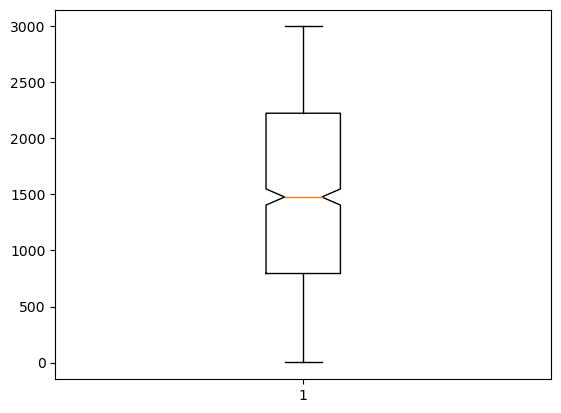

In [35]:
plt.boxplot(df.visit, notch=True)

In [37]:
# remove the lowest and highest 100
df1 = df[(df['visit'] <= 2900) & (df['visit'] >= 100)]  
print("After getting rid of outliers the new size of the data is - {}".format(*df1.shape))

After getting rid of outliers the new size of the data is - 923


### 3. Insert data into a SQL Lite database – create a table with the following data below that you will create yourself (Hint on how to create the SQL: Python for Data Analysis 2nd edition page 191, Python for Data Analysis 3rd Edition: Page 199):

In [45]:
import sqlite3

In [68]:
# connect to sqlite using in memory instead of creating db
conn = sqlite3.connect(':memory:')

# creating cursor to execute sql commands
c = conn.cursor()

# creating db for Name, Address, City, State, Zip, Phone Number
c.execute("""CREATE TABLE contactInformation (
            name TEXT,
            address TEXT,
            city TEXT,
            state TEXT,
            zip INTEGER,
            phoneNumber INTEGER
            )""")

# committing changes
conn.commit()

# Add at least 10 rows of data
contact_list = [
    ('Edna A. Funderburk','4819 Ferry Street', 'Atlanta', 'GA', 30308, 2567815850),
    ('Mark S. Pero','4775 Angie Drive', 'Orange', 'CA', 92668, 7149358058),
    ('Elizabeth A. Parker','4858 Thompson Street', 'Long Beach', 'CA', 90813, 5625913259),
    ('Michael S. Lewis','1757 Hiney Road', 'Las Vegas', 'NV', 89119, 7022900889),
    ('Sara D. Morgan','4399 Briarhill Lane', 'Akron', 'OH', 44308, 3302835709),
    ('Gina R. Wilson','1263 Washington Avenue', 'Jackson', 'MS', 39211, 6019206210),
    ('Brian M. Cheatham','3082 Rose Avenue', 'Metairie', 'LA', 70007, 5043449770),
    ('Linda G. Mason','2681 Burton Avenue', 'Memphis', 'TN', 38128, 9017034649),
    ('Diana E. Johnson','3992 Mount Tabor', 'White Plains', 'ny', 10601, 9145214388),
    ('Alejandro L. Butcher','2555 Washington Avenue', 'Phoenix', 'AZ', 85008, 6022205516)
]

c.executemany('''
    INSERT INTO contactInformation (name, address, city, state, zip, phoneNumber) VALUES (?,?,?,?,?,?)
    ''', contact_list)

# committing changes
conn.commit()

# submit your code with a query generating your results.
for row in c.execute ("SELECT * FROM contactInformation WHERE address LIKE '%Avenue'"):
    print(row)

#closing cursor
c.close()

# closing connection
conn.close()

('Gina R. Wilson', '1263 Washington Avenue', 'Jackson', 'MS', 39211, 6019206210)
('Brian M. Cheatham', '3082 Rose Avenue', 'Metairie', 'LA', 70007, 5043449770)
('Linda G. Mason', '2681 Burton Avenue', 'Memphis', 'TN', 38128, 9017034649)
('Alejandro L. Butcher', '2555 Washington Avenue', 'Phoenix', 'AZ', 85008, 6022205516)
